In [60]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from janome.tokenizer import Tokenizer

In [17]:
import pathlib
from collections import Counter

In [47]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/Library/Fonts/华文细黑.ttf',
 '/Library/Fonts/Arial Bold Italic.ttf',
 '/Library/Fonts/SourceSansPro-BlackIt.otf',
 '/Library/Fonts/MinionPro-BoldCnIt.otf',
 '/Library/Fonts/Microsoft/Candara Italic.ttf',
 '/Library/Fonts/STIXGeneralBolIta.otf',
 '/Library/Fonts/NuevaStd-Cond.otf',
 '/Library/Fonts/OCRAStd.otf',
 '/Library/Fonts/ChaparralPro-LightIt.otf',
 '/Library/Fonts/Trebuchet MS Bold.ttf',
 '/System/Library/Fonts/SFNSText-BoldItalicG2.otf',
 '/System/Library/Fonts/SFNSDisplay-Heavy.otf',
 '/Library/Fonts/STIXVarBol.otf',
 '/Library/Fonts/BlackoakStd.otf',
 '/Library/Fonts/KozMinPro-Medium.otf',
 '/Library/Fonts/KozMinPro-Heavy.otf',
 '/Library/Fonts/OsakaMono.ttf',
 '/Library/Fonts/Microsoft/Times New Roman Italic.ttf',
 '/Library/Fonts/WawaTC-Regular.otf',
 '/Library/Fonts/Microsoft/Palatino Linotype Bold Italic.ttf',
 '/Library/Fonts/Microsoft/Times New Roman Bold.ttf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMAntioch.otf',
 '/Library/Fonts/TrajanPro3-Bold.otf',
 '/Library/Fonts/Micro

In [63]:
font = {'family': 'Meiryo'}
matplotlib.rc('font', **font)

In [12]:
def word_feature(sentence, tokenizer):
    tokens = tokenizer.tokenize(sentence)
    bases = [t.base_form for t in tokens]
    return bases

In [3]:
train_root = pathlib.Path('./train')
test_root = pathlib.Path('./test')

In [38]:
train_data = pd.read_csv(train_root / 'train_data.csv')
train_label = pd.read_csv(train_root / 'train_label.csv', header=None, names=['id', 'category'])

In [21]:
train_data.head()

,id,text,place,open_type,open_season,open_day_of_week,open_hours_st,open_hours_ed,open_days_st,open_days_ed,open_allday,close_day_of_week
0,0,北小松水泳場内にあり、白砂青松で有名。設備の整ったキャンプ場は若者や子供連れの家族に好評です。,滋賀県,通年,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,平成26年7月、種差芝生地前にオープンした環境省の施設です。三陸復興国立公園、種差海岸及び階...,青森県,通年,冬,NaN,9:00,16:00,NaN,NaN,0,NaN
2,3,伊都国歴史博物館は糸島地方の歴史が良くわかるように、糸島市から出土した品々を中心に多数の考古...,福岡県,通年,NaN,NaN,9:00,17:00,NaN,NaN,0,月
3,4,かつては海であったが埋立てられ、現在は野鳥がさえずり緑が生い茂る。ここには、ビキニ沖で被爆し...,東京都,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,6,太平山自然公園の南側にある温泉利用型健康増進施設。三内峡温泉（カルシウム・ナトリウム硫酸塩泉...,秋田県,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [70]:
cat_cnt = Counter(train_label['category'])
for k,v in cat_cnt.items():
    print('{} : {}'.format(k, v))

Sports_Resort : 625
Museum : 544
Park : 594
Spa : 258
Restaurant : 415
Temple : 1351
Shop : 335
Histrical : 346


In [94]:
cat_list = list(set(train_label['category']))

In [22]:
 tokenizer = Tokenizer()
feature_func = lambda x: word_feature(x, tokenizer)

In [23]:
texts = train_data['text']
word_counter = CountVectorizer(min_df=3, tokenizer=feature_func)
train_feats = word_counter.fit_transform(texts)

In [24]:
words = []
for d in tqdm.tqdm(texts):
    words.extend(feature_func(d))

100%|██████████| 4468/4468 [01:17<00:00, 57.68it/s]


In [28]:
cntr = Counter(words)
top_100 = sorted(list(cntr.items()), key=lambda x:x[1])[::-1][:100]

In [30]:
top_100

[('の', 21000),
 ('、', 17502),
 ('。', 13971),
 ('に', 11485),
 ('を', 8669),
 ('が', 8423),
 ('する', 7635),
 ('は', 7624),
 ('た', 6759),
 ('て', 6269),
 ('ます', 5395),
 ('れる', 5019),
 ('と', 5013),
 ('で', 4113),
 ('いる', 4031),
 ('ある', 3674),
 ('だ', 3409),
 ('）', 3085),
 ('（', 3060),
 ('年', 2716),
 ('も', 2625),
 ('「', 2385),
 ('」', 2378),
 ('・', 2262),
 ('や', 2030),
 ('です', 1781),
 ('から', 1766),
 ('など', 1661),
 ('として', 1531),
 ('\u3000', 1416),
 ('られる', 1008),
 ('できる', 945),
 ('なる', 933),
 ('こと', 925),
 ('場', 884),
 ('時代', 854),
 (' ', 776),
 ('日', 766),
 ('月', 747),
 ('公園', 725),
 ('展示', 707),
 ('また', 690),
 ('寺', 623),
 ('指定', 599),
 ('文化財', 594),
 ('１', 586),
 ('お', 578),
 ('この', 573),
 ('市', 569),
 ('施設', 562),
 ('もの', 555),
 ('神社', 528),
 ('2', 517),
 ('その', 513),
 ('自然', 503),
 ('.', 502),
 ('おる', 501),
 ('(', 499),
 ('いう', 482),
 ('０', 480),
 ('温泉', 476),
 ('館', 455),
 ('地', 450),
 ('的', 439),
 ('まで', 433),
 ('中', 432),
 ('，', 430),
 ('大', 430),
 ('建立', 427),
 ('町', 426),
 ('現在', 421),
 (

In [40]:
cond = 'Spa'
labeled_texts = [tt for tt, label in zip(train_data['text'], train_label['category']) if label == cond]
labeled_words = []
for d in tqdm.tqdm(labeled_texts):
    labeled_words.extend(feature_func(d))
labeled_cntr = Counter(labeled_words)
top_100 = sorted(list(labeled_cntr.items()), key=lambda x:x[1])[::-1][:100]

100%|██████████| 258/258 [00:04<00:00, 52.46it/s]


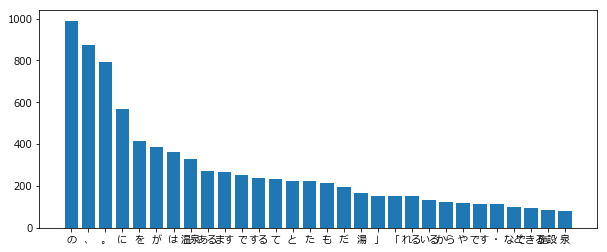

In [68]:
x, y = zip(*top_100[:30])
fig = plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.show()

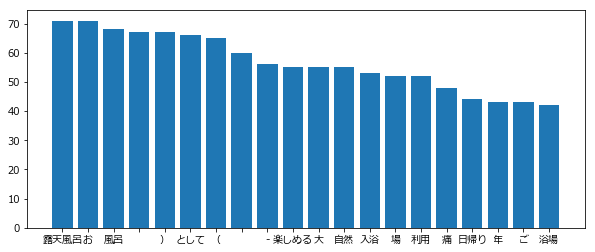

In [69]:
x, y = zip(*top_100[30:50])
fig = plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.show()

In [71]:
cond = 'Temple'
labeled_texts = [tt for tt, label in zip(train_data['text'], train_label['category']) if label == cond]
labeled_words = []
for d in tqdm.tqdm(labeled_texts):
    labeled_words.extend(feature_func(d))
labeled_cntr = Counter(labeled_words)
top_100 = sorted(list(labeled_cntr.items()), key=lambda x:x[1])[::-1][:100]

100%|██████████| 1351/1351 [00:34<00:00, 38.86it/s]


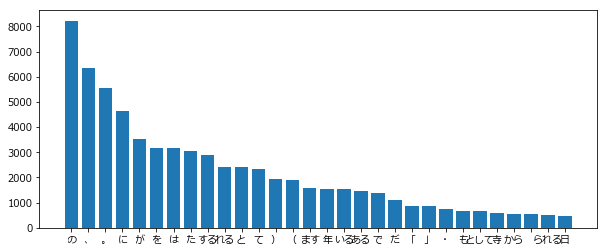

In [72]:
x, y = zip(*top_100[:30])
fig = plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.show()

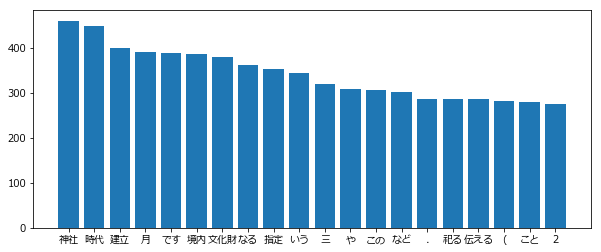

In [73]:
x, y = zip(*top_100[30:50])
fig = plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.show()

In [74]:
cond = 'Histrical'
labeled_texts = [tt for tt, label in zip(train_data['text'], train_label['category']) if label == cond]
labeled_words = []
for d in tqdm.tqdm(labeled_texts):
    labeled_words.extend(feature_func(d))
labeled_cntr = Counter(labeled_words)
top_100 = sorted(list(labeled_cntr.items()), key=lambda x:x[1])[::-1][:100]

100%|██████████| 346/346 [00:09<00:00, 37.76it/s]


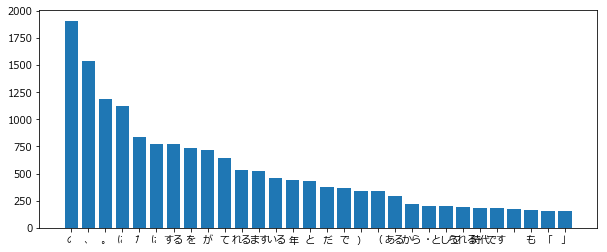

In [75]:
x, y = zip(*top_100[:30])
fig = plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.show()

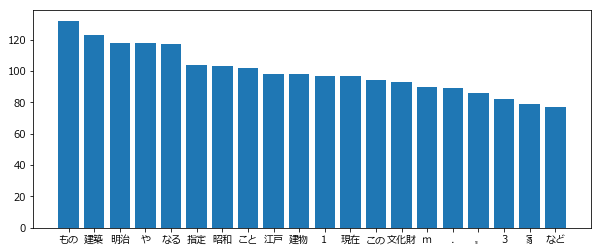

In [76]:
x, y = zip(*top_100[30:50])
fig = plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.show()

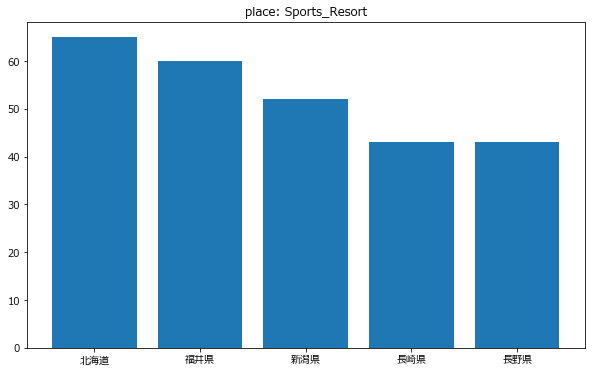

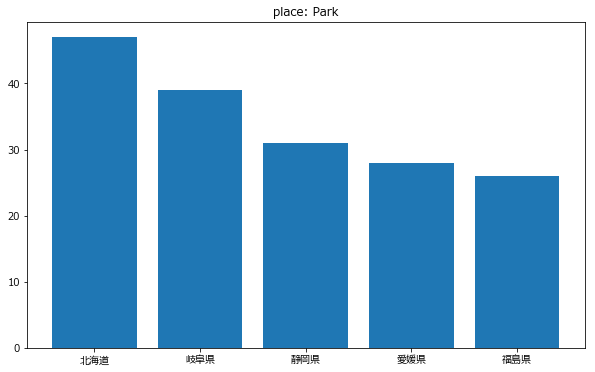

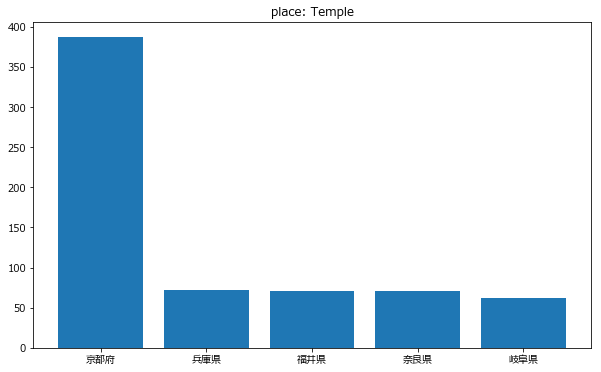

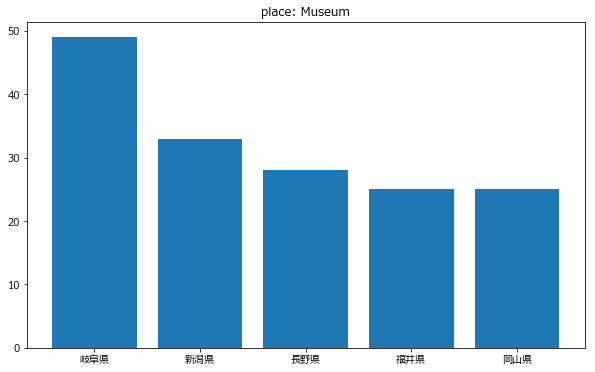

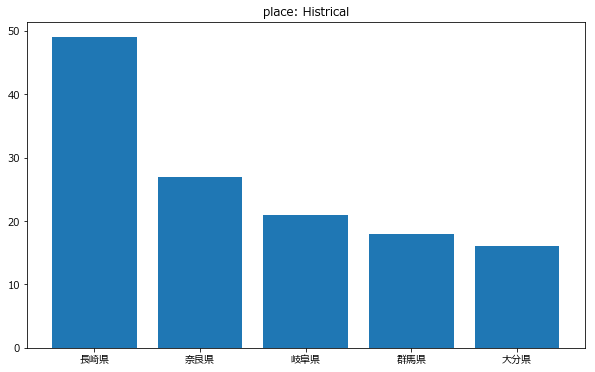

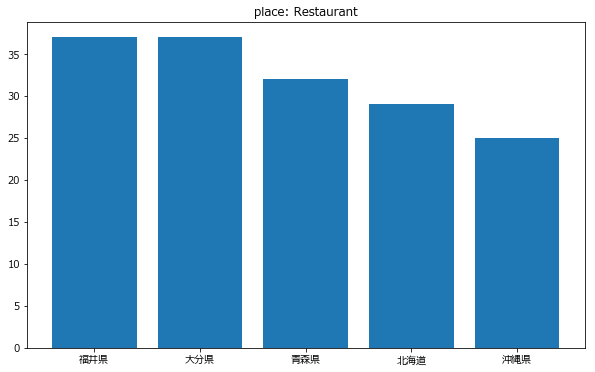

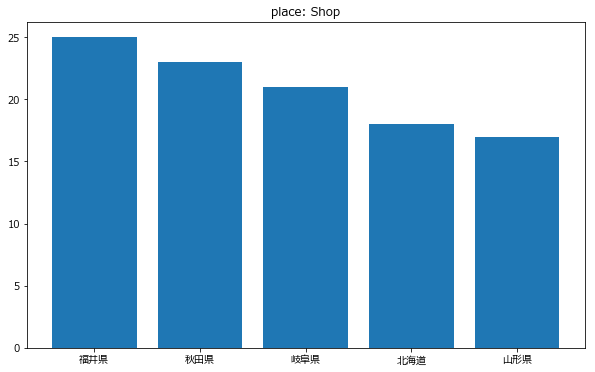

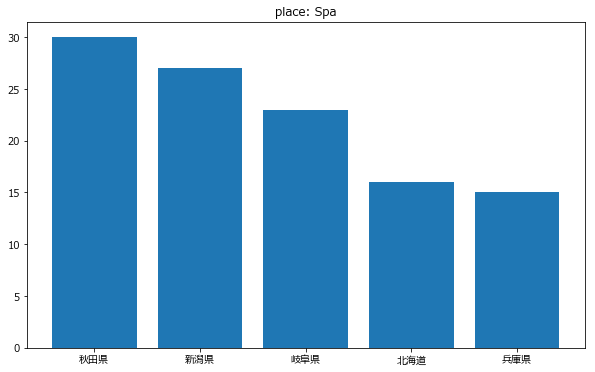

In [98]:
for cond in cat_list:
    labeled_places = [tt for tt, label in zip(train_data['place'], train_label['category']) if label == cond]
    place_cntr = Counter(labeled_places)
    top_5 = sorted(list(place_cntr.items()), key=lambda x:x[1])[::-1][:5]
    x, y = zip(*top_5)
    fig = plt.figure(figsize=(10, 6))
    plt.title('place: {}'.format(cond))
    plt.bar(x, y)
    plt.show()

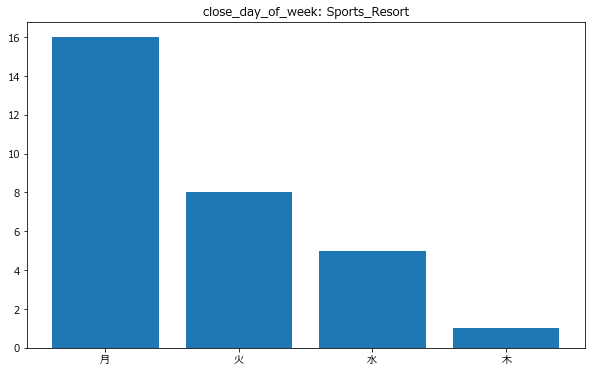

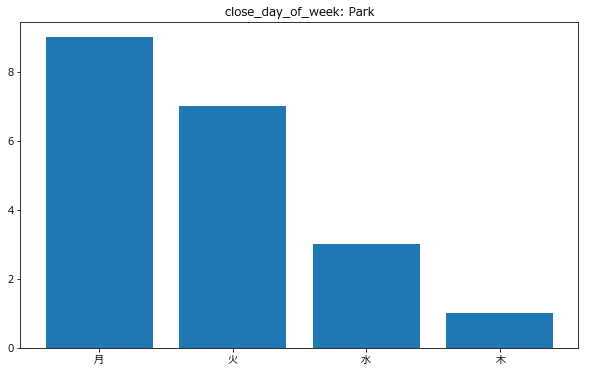

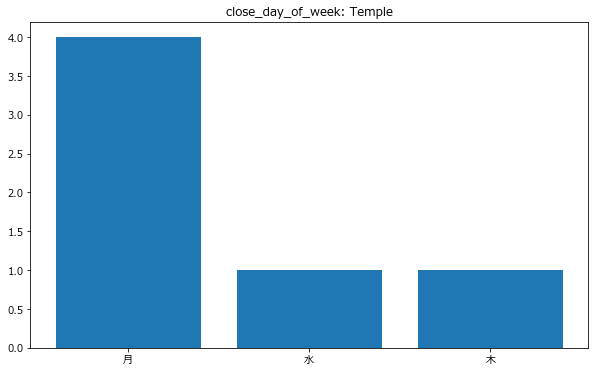

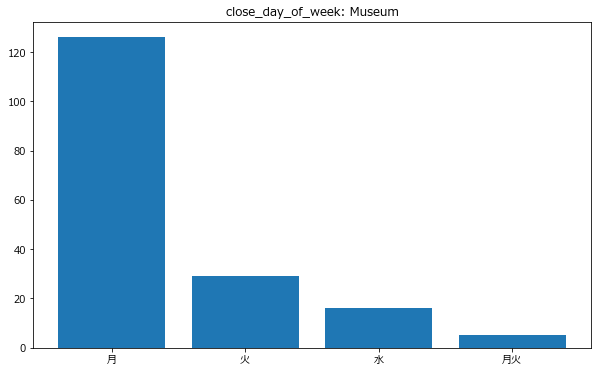

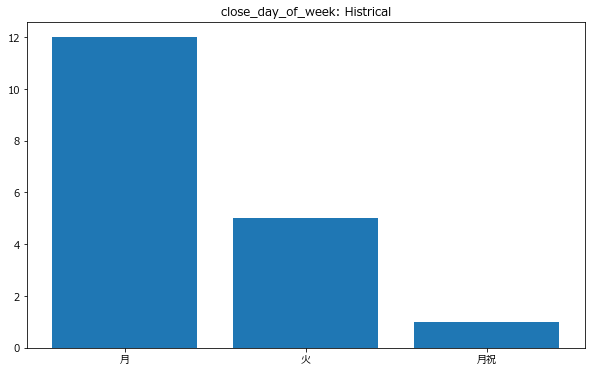

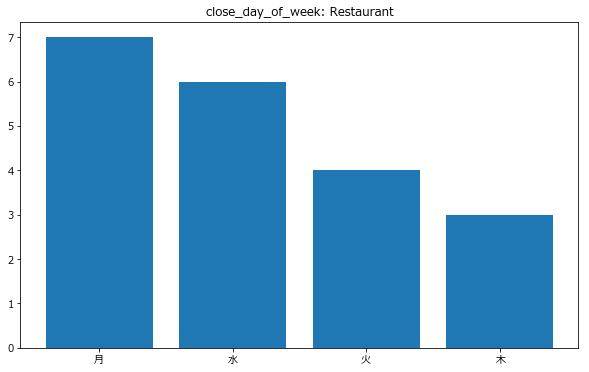

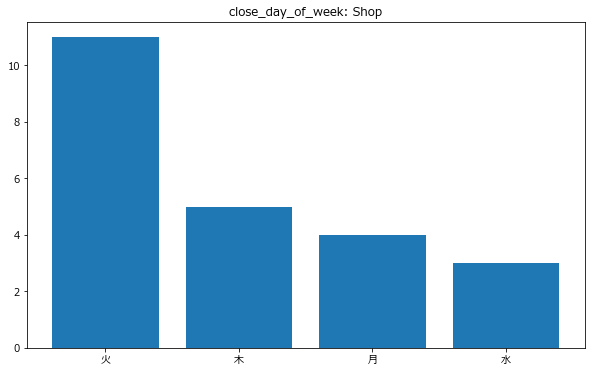

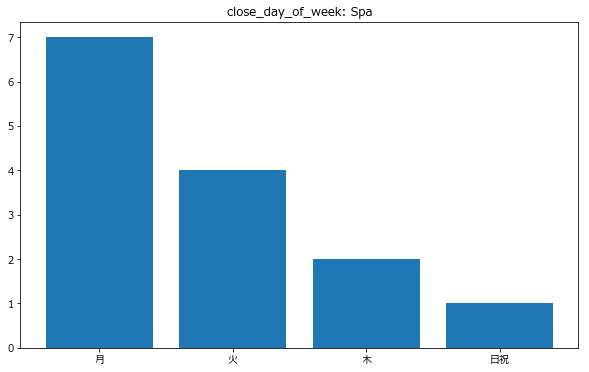

In [96]:
for cond in cat_list:
    labeled_close = [tt for tt, label in zip(train_data['close_day_of_week'], train_label['category']) if label == cond]
    close_cntr = Counter(labeled_close)
    top_5 = sorted(list(close_cntr.items()), key=lambda x:x[1])[::-1][1:5]
    x, y = zip(*top_5)
    fig = plt.figure(figsize=(10, 6))
    plt.bar(x, y)
    plt.title('close_day_of_week: {}'.format(cond))
    plt.show()